### Caution!!
A common mistake that beginners make is to think that a random walk is a
list of random numbers, and this is not the case at all.

# Random Walk

A random walk is different from a list of random numbers because the __next value__ in the sequence is a modification of the previous value in the sequence. The process used to generate the series forces dependence from one-time step to the next. This dependence provides some consistency
from step-to-step rather than the large jumps that a series of independent, random numbers provides. It is this dependency that gives the process its name as a random walk or a drunkard's walk.

stochastic vs random process

$$ y(t) = B_0 + B_1 * X(t-1) + e(t)$$

Where,
- y(t) is the next value in the series. 
- $B_0$ a constant drift to the random walk. 
- $B_1$ is a coefficient to weight the previous time step.
- X(t-1) is the observation at the previous time step.
- e(t) is thewhite noise 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [27]:
def generate_random_walk():
    noise = np.random.normal(0,1,1000)
    drift = 0.01
    b1 = 1.0
    y = [noise[0]]
    for e in noise[1:]: # noise == e
        y.append(drift+y[-1]*b1+e)
    return pd.Series(y)

In [31]:
random_walks = pd.concat([generate_random_walk() for i in range(10)],axis=1)

[Text(0.5, 1.0, 'Random Walks with same process')]

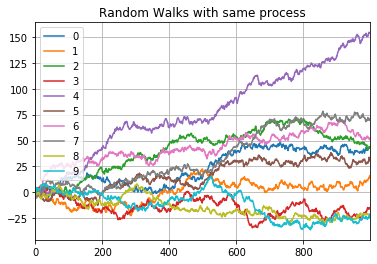

In [33]:
random_walks.plot(grid=True).set(title='Random Walks with same process')

In [34]:
# we have kept b1 as 1 in previous random walk examples
# we will see a strong auto correlation

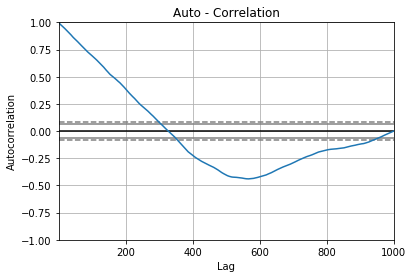

In [37]:
pd.plotting.autocorrelation_plot(random_walks[0])
_ = plt.title("Auto - Correlation")

### __All Random walks are non-stationary__

Use ADF or KPSS for testing of stationarity.

ADF  : Null-hypothesis ts is non - stationary
Kpss : null-hypothesis ts is stationary

In [42]:
from statsmodels.tsa.stattools import adfuller,kpss

In [46]:
adf = adfuller(random_walks[0])
print(adf)
# we cannot reject the null hypothesis
# i.e ts is non - stationary

(-1.1511253449784178, 0.6942593934731792, 0, 999, {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}, 2822.2970608248343)


In [48]:
kps = kpss(random_walks[0])
print(kps)
# we reject the null hypothesis
# and, the series is non-stationary

(3.672372548032192, 0.01, 22, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


 Note : We can make the random walk __stationary__ by taking the __first difference.__

In [50]:
adf = adfuller(random_walks[0].diff().dropna())
print(adf)
# we reject the null hypothesis
# i.e first difference of ts is stationary

(-30.46297052243145, 0.0, 0, 998, {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573}, 2820.269049915515)


In [52]:
kps = kpss(random_walks[0].diff().dropna())
print(kps)
# we cannot reject the null hypothesis
# i.e. first difference of time series is stationary

(0.10025047123770986, 0.1, 22, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


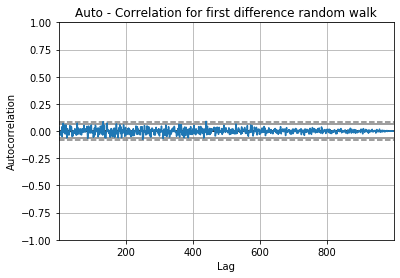

In [55]:
pd.plotting.autocorrelation_plot(random_walks[0].diff().dropna())
_ = plt.title("Auto - Correlation for first difference random walk")
# A very drastic change from the earlier plot

### Predicting a Random Walk
Given the way that the random walk is constructed, we can expect that the best prediction we could make would be to use the observation at the previous time step as what will happen in the next time step. Simply
because we know that the next time step will be a function of the prior time step. This is often called the naive forecast, or a persistence model.

__Persistence, or the naive forecast, is the best prediction we can make for a random walk time series.__

In [57]:
ts = random_walks[0]

In [60]:
y_pred = ts # we predict current value to be next value
y_obs = ts.shift() # next value in the time series

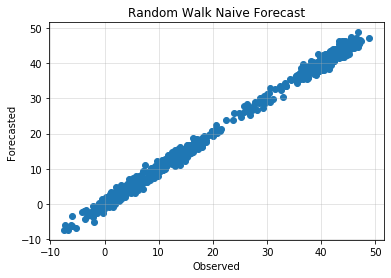

In [76]:
plt.scatter(y_obs,y_pred)
plt.xlabel("Observed")
plt.ylabel("Forecasted")
plt.title("Random Walk Naive Forecast")
plt.grid(True,alpha=0.4)

In [61]:
from sklearn.metrics import mean_squared_error

In [67]:
rmse = np.sqrt(mean_squared_error(y_obs[1:],y_pred[1:]))

In [71]:
print("RMSE :{:.3f}".format(rmse))
# this makes sense as we have chosen noise with a constant 
# std of 1

RMSE :1.019


## Check if ts is a Random Walk?

Some ways to check if your time series is a random walk are as follows:
- The time series shows a strong temporal dependence that decays linearly or in a similar
pattern.
- The time series is non-stationary and making it stationary shows no obviously learnable
structure in the data.
- The persistence model provides the best source of reliable predictions.